In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saurabhkumar395\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurabhkumar395\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saurabhkumar395\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Function to perform text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\n+', ' ', text)  # Remove newlines
    text = re.sub(r"['\"‘’“”]", '', text)  # Remove quotes
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]  # Remove stop words

    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]  # Perform stemming

    return ' '.join(stemmed_text)  # Join the tokens back into a string

In [4]:
data = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv")

In [5]:
# Apply preprocessing to the 'text' column in the dataset
data['processed_text'] = data['tweet_text'].apply(preprocess_text)

In [6]:
data.head()

,tweet_id,label,tweet_text,processed_text
0,1.360340e+18,1,"4,000 a day dying from the so called Covid-19 ...",4000 day die call covid19 vaccin report vaccin...
1,1.382900e+18,2,Pranam message for today manifested in Dhyan b...,pranam messag today manifest dhyan truth love ...
2,1.375670e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabadbas sought fund govern ramp product i...
3,1.381310e+18,1,"Confirmation that Chinese #vaccines ""don’t hav...",confirm chines vaccin dont high protect rate a...
4,1.362170e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab studi suggest pfizer moderna vaccin protec...


In [7]:
# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
sentiments = []

for text in data['processed_text']:
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Joy'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Sad'
    elif sentiment_score['compound'] <= -0.02:
        sentiment = 'Angry'
    else:
        sentiment = 'Fear'
    sentiments.append(sentiment)

data['Sentiment'] = sentiments

In [8]:
data.head(20)

,tweet_id,label,tweet_text,processed_text,Sentiment
0,1.360340e+18,1,"4,000 a day dying from the so called Covid-19 ...",4000 day die call covid19 vaccin report vaccin...,Sad
1,1.382900e+18,2,Pranam message for today manifested in Dhyan b...,pranam messag today manifest dhyan truth love ...,Joy
2,1.375670e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabadbas sought fund govern ramp product i...,Fear
3,1.381310e+18,1,"Confirmation that Chinese #vaccines ""don’t hav...",confirm chines vaccin dont high protect rate a...,Sad
4,1.362170e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab studi suggest pfizer moderna vaccin protec...,Joy
5,1.351290e+18,1,Still want to take the #jab?\n#PfizerBioNTech\...,still want take jab pfizerbiontech sideeffect ...,Sad
6,1.377330e+18,2,"This time, Aerolíneas flight AR1068 goes to Mo...",time aerolínea flight ar1068 goe moscow pick s...,Fear
7,1.363340e+18,3,#Covaxin effective against mutant virus strain...,covaxin effect mutant viru strain icmr thank d...,Sad
8,1.372580e+18,3,Safe and effective. #OxfordAstraZeneca,safe effect oxfordastrazeneca,Joy
9,1.367510e+18,2,The day after the #Moderna #COVID19Vaccine... ...,day moderna covid19vaccin arm littl sore littl...,Sad


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Count of each predicted sentiment category
sentiment_counts = data['Sentiment'].value_counts()

In [11]:
# Display count of each sentiment category
print("Count of Predicted Sentiments:")
print(sentiment_counts)

Count of Predicted Sentiments:
Fear     2619
Joy      2225
Sad      1134
Angry      22
Name: Sentiment, dtype: int64


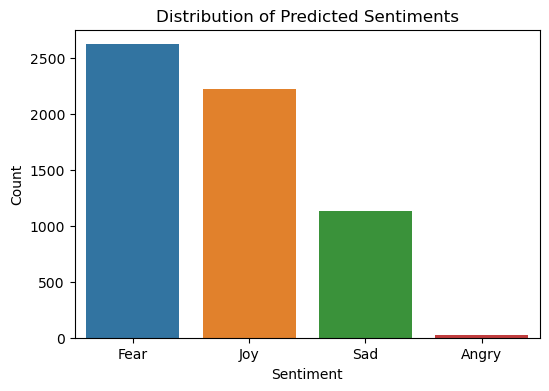

In [12]:
# Visualizing the distribution of predicted sentiments
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Sentiment', order=sentiment_counts.index)
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
# Calculate percentage distribution of sentiments
percentage_distribution = (sentiment_counts / len(data)) * 100
print("\nPercentage Distribution of Predicted Sentiments:")
print(percentage_distribution)


Percentage Distribution of Predicted Sentiments:
Fear     43.650000
Joy      37.083333
Sad      18.900000
Angry     0.366667
Name: Sentiment, dtype: float64
